<a href="https://colab.research.google.com/github/Divdev01/3253-Machine-Learning/blob/main/Climate_model_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 10.2 MB/s 
     |████████████████████████████████| 9.8 MB 42.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
from feature_engine.creation import MathFeatures
from feature_engine.selection import DropFeatures
from feature_engine.imputation import MeanMedianImputer

from feature_engine.encoding import OneHotEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
root ='/content/drive/MyDrive/Colab Notebooks/Omdena projects/Philadelphia/'
df = pd.read_csv(root+'train.csv')

In [6]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [7]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [9]:
# df.columns[8:43]

## Check for Duplicate and Null values

In [10]:
duplicate = df[df.duplicated()]
duplicate

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id


There is no duplication of rows.

In [11]:
no_of_missing_values = df.isnull().sum()
percent_of_missing_values = no_of_missing_values/df.shape[0] * 100

table = pd.DataFrame(percent_of_missing_values , columns=['percentage of missing values'] )   # Create dataframe with percentage of missing values

table[table.any(axis=1)]      # remove the rows with zeros

,percentage of missing values
year_built,2.424858
energy_star_rating,35.256148
direction_max_wind_speed,54.228652
direction_peak_wind_speed,55.190939
max_wind_speed,54.228652
days_with_fog,60.451179


In [12]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [13]:
# climate_df = train_df.copy()

In [14]:
# creating seperate list of features for clarity

monthly_temp_features = ['january_min_temp', 'january_avg_temp', 'january_max_temp',
                           'february_min_temp', 'february_avg_temp', 'february_max_temp',
                           'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
                           'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
                           'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
                           'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
                           'august_avg_temp', 'august_max_temp', 'september_min_temp',
                           'september_avg_temp', 'september_max_temp', 'october_min_temp',
                           'october_avg_temp', 'october_max_temp', 'november_min_temp',
                           'november_avg_temp', 'november_max_temp', 'december_min_temp',
                           'december_avg_temp', 'december_max_temp']

other_weather_features = ['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
                           'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
                           'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
                           'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
                           'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

other_features = ['Year_Factor', 'State_Factor', 'building_class', 
                  'facility_type', 'floor_area', 'year_built', 
                  'energy_star_rating', 'ELEVATION']
target =  ['site_eui']

In [15]:
# Correlation matrix for the monthly temperature features and the target

corr_mat = train_df[monthly_temp_features + target].corr()

In [17]:
# corr_mat['january_avg_temp'].sort_values(ascending = False)   # jan_avg_ temp has 

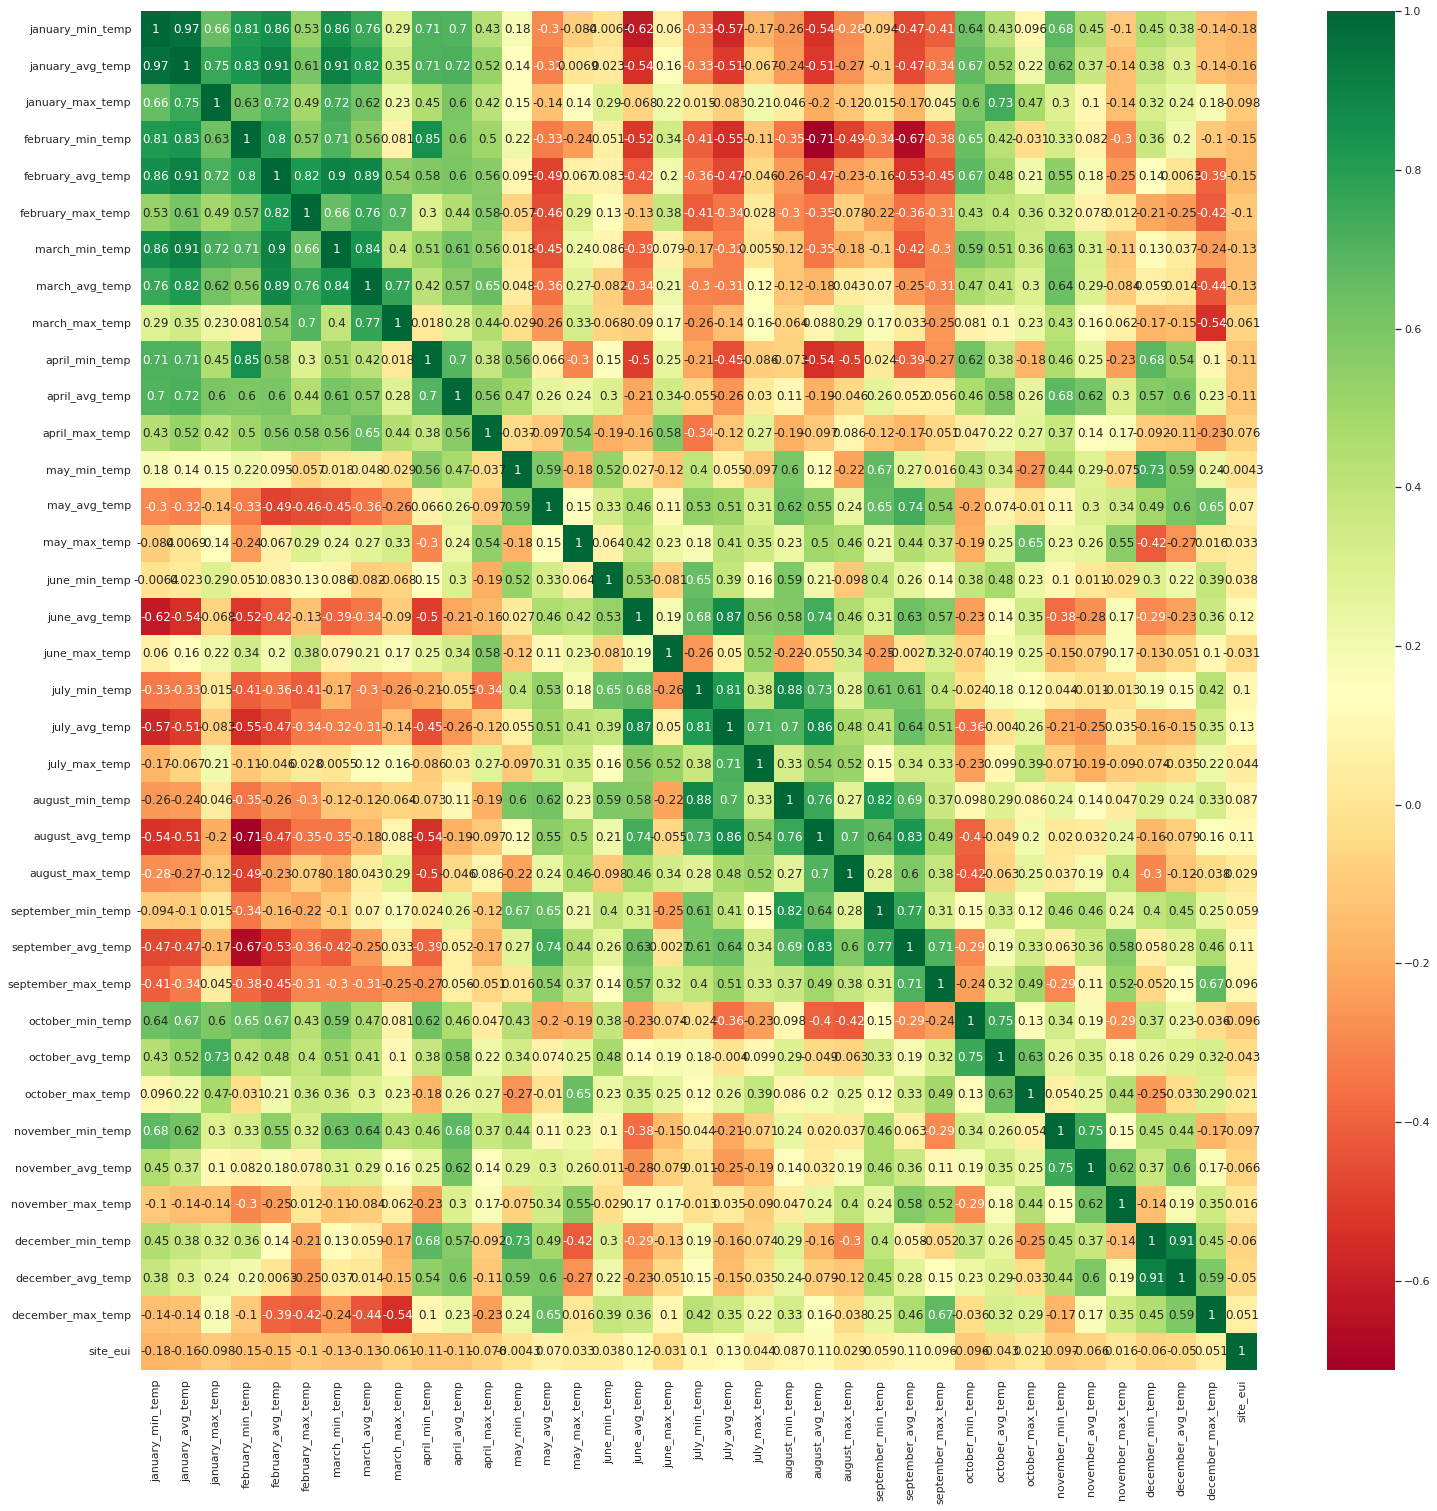

In [18]:
## cmap = sns.diverging_palettte(230, 20, as_cmap =True)
sns.set(rc = {'figure.figsize' :(25,25)})
sns.heatmap(corr_mat, cmap = "RdYlGn", annot = True)


The correlation of temperature features with th target is very low ranging from  -0.11 to 0.11

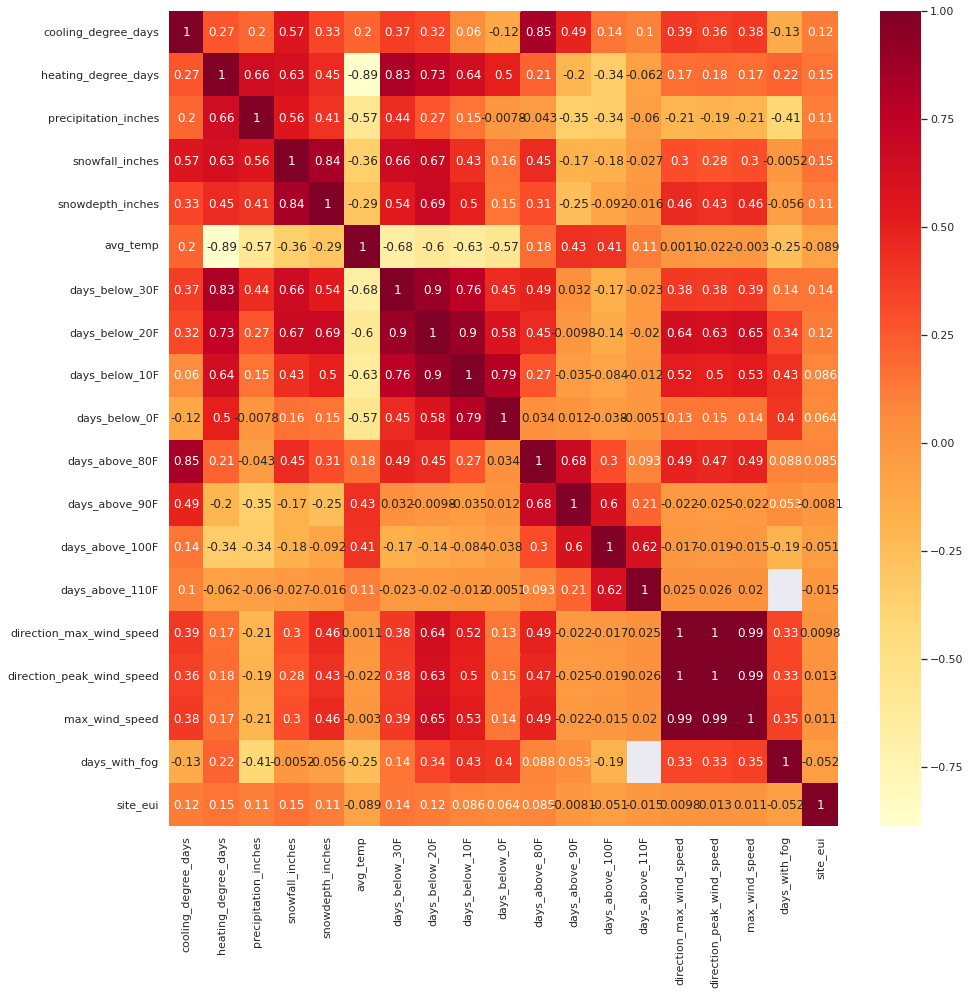

In [19]:
sns.set(rc = {'figure.figsize' :(15,15)})
sns.heatmap(train_df[other_weather_features + target].corr(), cmap = "YlOrRd", annot = True)


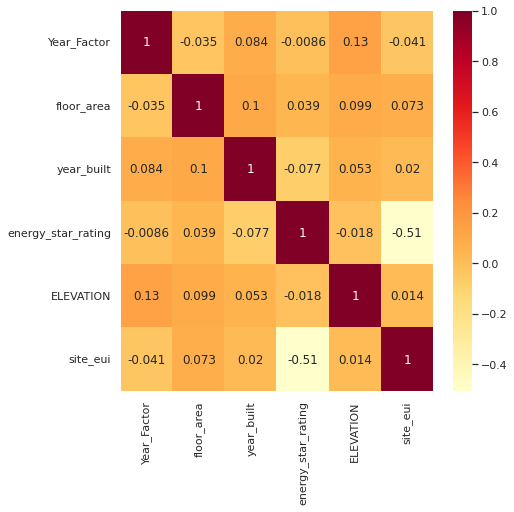

In [20]:
sns.set(rc = {'figure.figsize' :(7,7)})
sns.heatmap(train_df[other_features + target].corr(), cmap = "YlOrRd", annot = True)

Since most of the temperature features are correlated, I'm creating 4 Seasonal average temperature features.

In [21]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
50443,5,State_6,Residential,Multifamily_Uncategorized,78390.0,1927.0,NaN,25.6,8,29.854839,...,106,12,0,0,330.0,340.0,18.3,148.0,98.884506,50443
12335,6,State_4,Commercial,Education_Other_classroom,141329.0,1903.0,29.0,189.0,-2,25.166667,...,113,40,0,0,NaN,NaN,NaN,NaN,88.306093,12335
56075,6,State_6,Residential,Multifamily_Uncategorized,87961.0,2006.0,42.0,3.4,11,34.451613,...,96,17,0,0,1.0,1.0,1.0,106.0,88.058743,56075
53059,6,State_6,Residential,Multifamily_Uncategorized,356000.0,1948.0,89.0,3.4,11,34.451613,...,96,17,0,0,1.0,1.0,1.0,NaN,85.765027,53059
38154,4,State_6,Commercial,Lodging_Hotel,71500.0,2009.0,67.0,42.7,4,28.596774,...,75,4,0,0,1.0,1.0,1.0,NaN,83.248565,38154


In [22]:
y_train = train_df['site_eui'].copy()
X_train = train_df.drop('site_eui', axis = 1)


In [23]:
monthly_temp_features

['january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp']

In [24]:
features_to_delete = [i for i in monthly_temp_features if ('min' in i or 'max' in i)] 
features_to_delete

['january_min_temp',
 'january_max_temp',
 'february_min_temp',
 'february_max_temp',
 'march_min_temp',
 'march_max_temp',
 'april_min_temp',
 'april_max_temp',
 'may_min_temp',
 'may_max_temp',
 'june_min_temp',
 'june_max_temp',
 'july_min_temp',
 'july_max_temp',
 'august_min_temp',
 'august_max_temp',
 'september_min_temp',
 'september_max_temp',
 'october_min_temp',
 'october_max_temp',
 'november_min_temp',
 'november_max_temp',
 'december_min_temp',
 'december_max_temp']

In [25]:
corr_other_weather_features = train_df[other_weather_features + target].corr()
# corr_other_weather_features
corr_other_weather_features['site_eui'].sort_values()

avg_temp                    -0.088609
days_with_fog               -0.052013
days_above_100F             -0.050848
days_above_110F             -0.014841
days_above_90F              -0.008094
direction_max_wind_speed     0.009808
max_wind_speed               0.010679
direction_peak_wind_speed    0.012549
days_below_0F                0.064077
days_above_80F               0.084774
days_below_10F               0.085749
precipitation_inches         0.108958
snowdepth_inches             0.110726
days_below_20F               0.118771
cooling_degree_days          0.120913
days_below_30F               0.137580
heating_degree_days          0.145339
snowfall_inches              0.153409
site_eui                     1.000000
Name: site_eui, dtype: float64

dropping the features that has correlation from range -0.08 to 0.08

In [26]:
features_to_delete = features_to_delete + ['avg_temp', 'days_with_fog', 'days_above_100F', 'days_above_110F', 'days_above_90F', 'direction_max_wind_speed',
                          'max_wind_speed', 'direction_peak_wind_speed', 'days_below_0F', 'days_above_80F', 'days_below_10F'] 

In [27]:
features_to_delete

['january_min_temp',
 'january_max_temp',
 'february_min_temp',
 'february_max_temp',
 'march_min_temp',
 'march_max_temp',
 'april_min_temp',
 'april_max_temp',
 'may_min_temp',
 'may_max_temp',
 'june_min_temp',
 'june_max_temp',
 'july_min_temp',
 'july_max_temp',
 'august_min_temp',
 'august_max_temp',
 'september_min_temp',
 'september_max_temp',
 'october_min_temp',
 'october_max_temp',
 'november_min_temp',
 'november_max_temp',
 'december_min_temp',
 'december_max_temp',
 'avg_temp',
 'days_with_fog',
 'days_above_100F',
 'days_above_110F',
 'days_above_90F',
 'direction_max_wind_speed',
 'max_wind_speed',
 'direction_peak_wind_speed',
 'days_below_0F',
 'days_above_80F',
 'days_below_10F']

### Creating New features and eliminating redundant features that does not have a good correlation with site_eui, the target variable

In [28]:
df = X_train.copy()
winter_features = ['december_avg_temp', 'january_avg_temp', 'february_avg_temp']
spring_features = ['march_avg_temp', 'april_avg_temp', 'may_avg_temp'] 
summer_features = ['june_avg_temp', 'july_avg_temp','august_avg_temp'] 
fall_features   = ['september_avg_temp', 'october_avg_temp','november_avg_temp']

temp_drop_transformer = DropFeatures(
    features_to_drop = features_to_delete
)

winter_transformer = MathFeatures(
    variables= winter_features,
    func = ['mean'],
    new_variables_names = ["winter_avg_temp"],
    drop_original = True

)
spring_transformer = MathFeatures(
    variables= spring_features,
    func = ['mean'],
    new_variables_names = ["spring_avg_temp"],
    drop_original = True

)
summer_transformer = MathFeatures(
    variables= summer_features,
    func = ['mean'],
    new_variables_names = ["summer_avg_temp"],
    drop_original = True

)

fall_transformer = MathFeatures(
    variables= fall_features,
    func = ['mean'],
    new_variables_names = ["fall_avg_temp"],
    drop_original = True

)



In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

## Preprocessing for numerical varibles

In [30]:
cat_columns = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
num_columns = X_train.loc[:, ~X_train.columns.isin(cat_columns)].columns
num_columns

Index(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_belo

In [31]:
X_train_num = X_train[num_columns]
X_train_num.head()

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
50443,78390.0,1927.0,NaN,25.6,8,29.854839,56,2,23.946429,43,...,0,106,12,0,0,330.0,340.0,18.3,148.0,50443
12335,141329.0,1903.0,29.0,189.0,-2,25.166667,50,2,29.711538,65,...,6,113,40,0,0,NaN,NaN,NaN,NaN,12335
56075,87961.0,2006.0,42.0,3.4,11,34.451613,59,-1,37.706897,61,...,1,96,17,0,0,1.0,1.0,1.0,106.0,56075
53059,356000.0,1948.0,89.0,3.4,11,34.451613,59,-1,37.706897,61,...,1,96,17,0,0,1.0,1.0,1.0,NaN,53059
38154,71500.0,2009.0,67.0,42.7,4,28.596774,58,9,31.625000,56,...,0,75,4,0,0,1.0,1.0,1.0,NaN,38154


In [32]:
# set up the imputer
from feature_engine.imputation import ArbitraryNumberImputer

median_imputer = MeanMedianImputer(
                   imputation_method='median',
                   variables=[ 'energy_star_rating']
                   )

arbitrary_imputer = ArbitraryNumberImputer(
    arbitrary_number = -999,
    variables = ['year_built', 'max_wind_speed'],
    )




In [33]:
cat_columns

['Year_Factor', 'State_Factor', 'building_class', 'facility_type']

In [34]:
# encoder = OneHotEncoder(categories=cat_columns)

In [35]:
encoder = OneHotEncoder(variables=cat_columns , drop_last = True,  ignore_format=True)

In [36]:
# pipeline for numerical data

num_pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy="median")),
        ('simple_median_imputer', median_imputer),
        ('arb_imputer', arbitrary_imputer),
        ('temp_drop', temp_drop_transformer),
        ('winter_temp_avg', winter_transformer),
        ('spring_temp_avg', spring_transformer),
        ('summer_temp_avg', summer_transformer),
        ('fall_temp_avg', fall_transformer),
        ('std_scaler', StandardScaler())
    ])

# X_train_num = num_pipeline.fit_transform(train_num)

In [37]:
# X_train_num

In [38]:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline,num_columns),
                                   ("cat", encoder, cat_columns )
                                   
]

)

In [39]:
df = X_train.copy()
X_train_processed = full_pipeline.fit_transform(df)

In [40]:
X_train_processed.shape

(60605, 87)

In [41]:
X_test_processed = full_pipeline.fit_transform(test_df)

In [42]:
X_test_processed.shape

(15152, 87)

# Evaluation with cross validation

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train_processed, y_train)



DecisionTreeRegressor(random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error

def train_rmse(model):
  pred = model.predict(X_train_processed)
  mse = mean_squared_error(y_train, pred)
  rmse = np.sqrt(mse)
  print("Training set rmse score:", rmse)

In [50]:
# Score of prediction on training set -  linear regression model
train_rmse(lin_reg)

Training set rmse score: 46.63000294491743


In [51]:
# Score on cross validation set - linear regression model

lin_scores = cross_val_score(lin_reg, X_train_processed, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [40.92128694 47.12616438 45.94757199 51.52105706 44.38122097 47.85248901
 47.11599417 46.39631515 48.28551997 47.93727098]
Mean: 46.748489062685735
Standard deviation: 2.6148675617095036


rmse of Linear regression  is 46.63 and the cross validation error also 46.75. But 46 is still pretty high and that is because the model is under fitting. We can increase the complexity of the model. 

In [48]:
# Score of prediction on training set -  Decision tree model

train_rmse(tree_reg)

Training set rmse score: 0.0


In [49]:

# Score on cross validation set - Decision tree model

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,X_train_processed, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)


Scores: [50.27987178 53.59338598 52.99668098 58.76807295 51.64357935 54.12973637
 49.10822567 54.28415685 54.59593311 53.97490084]
Mean: 53.33745438698277
Standard deviation: 2.515784330804845


Training set RMSE is 0 which means it is predicting perfectly. But the crossvalidation error is very high. That means the model is highly overfitting.


In [52]:
# Score of prediction on training set -  random forest model

from sklearn.metrics import mean_squared_error

forest_predictions = forest_reg.predict(X_train_processed)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

14.616266061819823

In [53]:
# Score on cross validation set - random forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train_processed, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [35.6973931  40.47164337 38.58615343 45.33953763 38.49076933 39.80189445
 36.87145046 40.26209162 41.63656191 40.46720514]
Mean: 39.76247004432942
Standard deviation: 2.5248850635191276


RMSE  score is 14 and cross validation is 39 which is better than the decision tree model but still it is overfitting . 



## Fine tune the Model

### Grid search 

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [9,10,11,12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [10,11]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_processed, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [9, 10, 11, 12],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [10, 11],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50.24509721060412 {'max_features': 9, 'n_estimators': 3}
45.61898876392912 {'max_features': 9, 'n_estimators': 10}
44.27239985025646 {'max_features': 9, 'n_estimators': 30}
49.982592038251546 {'max_features': 10, 'n_estimators': 3}
45.30831593100487 {'max_features': 10, 'n_estimators': 10}
43.95415717869045 {'max_features': 10, 'n_estimators': 30}
49.39969834173087 {'max_features': 11, 'n_estimators': 3}
45.14788499330535 {'max_features': 11, 'n_estimators': 10}
43.82022658932493 {'max_features': 11, 'n_estimators': 30}
49.71901453349436 {'max_features': 12, 'n_estimators': 3}
45.17413702320658 {'max_features': 12, 'n_estimators': 10}
43.629692618374115 {'max_features': 12, 'n_estimators': 30}
49.907300106540184 {'bootstrap': False, 'max_features': 10, 'n_estimators': 3}
45.56456503948345 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
49.34637754250155 {'bootstrap': False, 'max_features': 11, 'n_estimators': 3}
45.15399285090677 {'bootstrap': False, 'max_features': 11, 'n

### Random search 

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=50),
        'max_features': randint(low=5, high=13),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_processed, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0919efc50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc092ca1950>},
                   random_state=42, scoring='neg_mean_squared_error')

In [59]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

43.824394538430795 {'max_features': 11, 'n_estimators': 29}
43.567263842658384 {'max_features': 11, 'n_estimators': 43}
43.962699455525666 {'max_features': 12, 'n_estimators': 21}
44.161100717456556 {'max_features': 11, 'n_estimators': 19}
44.980510266562575 {'max_features': 11, 'n_estimators': 11}
44.85906188540101 {'max_features': 7, 'n_estimators': 24}
44.178501958367015 {'max_features': 9, 'n_estimators': 36}
43.77545042792611 {'max_features': 12, 'n_estimators': 24}
44.91895880851489 {'max_features': 7, 'n_estimators': 22}
53.61589323160998 {'max_features': 9, 'n_estimators': 2}


Best  model that I got so far

In [68]:
final_model = rnd_search.best_estimator_


### Evaluation on test set

In [61]:
test_df.shape

(15152, 64)

In [62]:
X_test = test_df.drop('site_eui', axis= 1)
y_test = test_df['site_eui'].copy()

In [63]:
X_test_processed = full_pipeline.transform(X_test)

In [64]:
test_prediction = final_model.predict(X_test_processed)

In [65]:
final_mse = mean_squared_error(y_test, test_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

59.22358824620189

In [66]:
import joblib
joblib.dump(final_model, 'model_1.pkl')


['model_1.pkl']

The Random Forest Regressor model is performing even worse in test set. So the model is completly overfitting the training data. 

* RMSE on Training data - 14.616266061819823
* RMSE on cross-validation data - Mean: 39.76247004432942
* RMSE on test data - 59.22358824620189

To do

- try different imputation, change year built to age , remove outliers
- have to do some feature engineering( whether i can come with new feature that have good correlation)
- should try Reducing tree depth, Reduce the number of variables sampled at each split. 

ref
https://crunchingthedata.com/random-forest-overfitting/